In [2]:
# ! pip install python-dotenv

In [3]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

True

In [4]:
# ! pip install openai

In [5]:
import openai

In [26]:
load_dotenv()

# Access the API key
api_key = os.getenv("AZURE_OPENAI_API_KEY")
api_version = os.getenv("API_VERSION")
api_endpoint = os.getenv("AZURE_BASE_URL")
model_name = "gpt-4o-mini"

In [ ]:
# # COnfigure OPenAI
# openai.api_type = "azure"
# openai.api_key = api_key
# openai.api_endpoint = api_endpoint
# openai.api_version = "2023-03-15-preview"

In [17]:
# response = openai.chat.completions.create(
#     model = "gpt-4o-mini",
#     azure_endpoint = api_endpoint,
#     messages = [
#         {"role": "system", "content": "You're a helpful assistant."},
#         {"role": "user", "content": "Tell me a joke"}
#     ]
# )

### Image Comprehension

In [38]:
import requests

url = f"https://picsum.photos/1280/720"
response = requests.get(url, verify=False)
image_url = response.url

c:\Users\Varun.Tyagi\OneDrive - Brillio\Documents\personnel\LangLeap\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'picsum.photos'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\Varun.Tyagi\OneDrive - Brillio\Documents\personnel\LangLeap\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fastly.picsum.photos'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


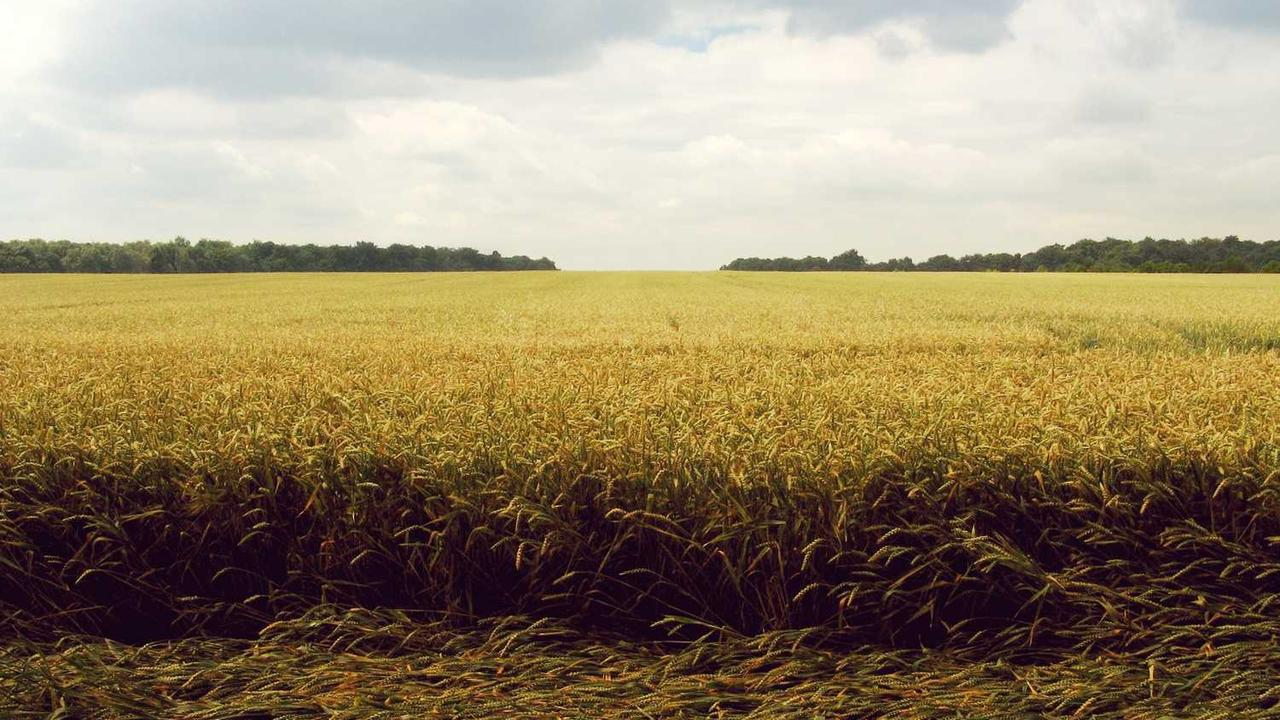

In [39]:
from IPython.display import display
from PIL import Image
from io import BytesIO

# Convert response to image
image = Image.open(BytesIO(response.content))

# Display the image
display(image)

In [14]:
# ! pip install pillow

In [34]:
from openai import AzureOpenAI

client = AzureOpenAI(
    api_key=api_key,
    api_version=api_version,
    azure_endpoint=api_endpoint)

response = client.chat.completions.create(
      model=model_name,
      messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": "describe this image like in an IELTS exam. Keep it consize and within 50 words"},
            {
              "type": "image_url",
              "image_url": {
                "url": image_url,
              },
            },
          ],
        }
      ],
      max_tokens=50,
    )

print("Chat GPT:")
print(response.choices[0].message.content)
# return response.choices[0].message.content

Chat GPT:
The image captures a beautiful sunset viewed through a metal grid. Sunlight streams through the gaps, illuminating a busy highway below, where cars are in motion. The backdrop features trees silhouetted against a multi-colored sky, blending warm hues of orange and blue


In [35]:
model_desc = response.choices[0].message.content

In [ ]:
from openai import AzureOpenAI

client = AzureOpenAI(
    api_key=api_key,
    api_version=api_version,
    azure_endpoint=api_endpoint)

response = client.chat.completions.create(
      model=model_name,
      messages=[
        {
          "role": "user",
          "content": [
            {
                "type": "text",
                "text": "describe this image like a begineer who has little knowledge of english Keep it consize and within 50 words"},
            {
              "type": "image_url",
              "image_url": {
                "url": image_url,
              },
            },
          ],
        }
      ],
      max_tokens=50,
    )

print("Chat GPT:")
print(response.choices[0].message.content)
# return response.choices[0].message.content

Chat GPT:
This picture shows a sunset. The sun is bright and orange. There is a fence in front. Below the fence, there is a road. Cars are driving on the road. Trees are seen on the side. The sky has colors like blue and


In [32]:
user_desc = response.choices[0].message.content

In [ ]:
completion = client.chat.completions.create(
      model=model_name,
      messages=[
      {
          "role": "system", 
          "content": "You are a language teacher. you have a predefined description of an image, and also a user written dscription. you just have to judge the language, grammer and vocabolary of the user provided description. keep in mind that the user is a beginner so be supportive and helpful."
          },
      {
          "role": "user", 
          "content": f"Description: {model_desc},user Description: {user_desc}. based on these two respond what all the user can improve in their description of the image, keep it consize and to the point "
          }
      ],
      # max_tokens=100,
    )

print(completion.choices[0].message.content)

Your description is a good start! Here are some areas for improvement:

1. **Details**: You could include more details about the sunset colors. Instead of just saying "bright and orange," mention other colors you see, like pink or purple, to match the original description.

2. **Vocabulary**: Instead of using simple words like "fence," you might want to use "metal grid" to be more specific.

3. **Completeness**: The last part of your sentence, "the sky has colors like blue and," is incomplete. Make sure to finish your thought.

4. **Varied Sentence Structure**: Try mixing short and longer sentences for a more interesting flow.

5. **Descriptive Adjectives**: Use adjectives to describe the scene further, such as "busy" for the road or "silhouetted" for the trees.

Overall, you're doing great. Keep practicing!


In [ ]:
import together
import ssl

# Disable SSL verification (temporary workaround)
ssl._create_default_https_context = ssl._create_unverified_context

# Set Together AI API Key
together.api_key = ""

# Call the model
response = together.Complete.create(
    model="togethercomputer/llama-2-7b-chat",
    prompt="What is artificial intelligence?",
    max_tokens=200
)

print(response['output']['choices'][0]['text'])


C:\Users\Varun.Tyagi\AppData\Local\Temp\ipykernel_20448\2326869844.py:11: DeprecationWarning: Call to deprecated function create.
  response = together.Complete.create(


APIConnectionError: Error communicating with API: HTTPSConnectionPool(host='api.together.xyz', port=443): Max retries exceeded with url: /v1/completions (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)')))

In [25]:
! pip install --upgrade certifi

In [ ]:
# checking the change